# Pymc3: Probabilistic Programming in Python: Bayesian Modeling and Probabilistic Machine Learning

Available in the "Python 3 (Ubuntu Linux)" kernel.

http://docs.pymc.io/intro.html

In [1]:
import pymc3 as pm
pm.__version__

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


'3.3'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize random number generator
np.random.seed(123)

# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

In [3]:
basic_model = pm.Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10, shape=2)
    sigma = pm.HalfNormal('sigma', sd=1)

    # Expected value of outcome
    mu = alpha + beta[0]*X1 + beta[1]*X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=Y)


In [4]:
map_estimate = pm.find_MAP(model=basic_model)
map_estimate

  0%|          | 0/5000 [00:00<?, ?it/s]

logp = -328.33, ||grad|| = 464.32:   0%|          | 0/5000 [00:00<?, ?it/s]

logp = -149.58, ||grad|| = 12.242:   0%|          | 10/5000 [00:00<00:08, 600.73it/s]

logp = -149.58, ||grad|| = 12.242: 100%|██████████| 19/19 [00:00<00:00, 792.13it/s]  

{'alpha': array(0.90660093),
 'beta': array([0.94848596, 2.60711845]),
 'sigma': array(0.96298858),
 'sigma_log__': array(-0.03771373)}

In [5]:
with basic_model:
    # draw 500 posterior samples
    trace = pm.sample()

Auto-assigning NUTS sampler...


Initializing NUTS using jitter+adapt_diag...


Sequential sampling (2 chains in 1 job)


NUTS: [sigma_log__, beta, alpha]


  0%|          | 0/1000 [00:00<?, ?it/s]

  2%|▏         | 20/1000 [00:00<00:04, 197.94it/s]

  6%|▌         | 56/1000 [00:00<00:03, 277.97it/s]

 10%|█         | 105/1000 [00:00<00:02, 347.37it/s]

 17%|█▋        | 167/1000 [00:00<00:02, 414.59it/s]

 21%|██▏       | 214/1000 [00:00<00:01, 418.35it/s]

 26%|██▌       | 262/1000 [00:00<00:01, 427.73it/s]

 32%|███▏      | 320/1000 [00:00<00:01, 448.36it/s]

 39%|███▊      | 387/1000 [00:00<00:01, 475.04it/s]

 45%|████▌     | 452/1000 [00:00<00:01, 493.81it/s]

 53%|█████▎    | 527/1000 [00:01<00:00, 518.26it/s]

 60%|██████    | 600/1000 [00:01<00:00, 536.98it/s]

 68%|██████▊   | 685/1000 [00:01<00:00, 562.65it/s]

 77%|███████▋  | 773/1000 [00:01<00:00, 586.03it/s]

 86%|████████▋ | 864/1000 [00:01<00:00, 608.69it/s]

 95%|█████████▍| 948/1000 [00:01<00:00, 623.57it/s]

100%|██████████| 1000/1000 [00:01<00:00, 630.44it/s]


  0%|          | 0/1000 [00:00<?, ?it/s]

  6%|▌         | 61/1000 [00:00<00:01, 602.42it/s]

 12%|█▏        | 116/1000 [00:00<00:01, 571.29it/s]

 18%|█▊        | 177/1000 [00:00<00:01, 582.86it/s]

 24%|██▍       | 242/1000 [00:00<00:01, 593.95it/s]

 30%|███       | 305/1000 [00:00<00:01, 599.09it/s]

 37%|███▋      | 374/1000 [00:00<00:01, 613.40it/s]

 44%|████▍     | 439/1000 [00:00<00:00, 617.81it/s]

 50%|████▉     | 499/1000 [00:00<00:00, 615.04it/s]

 56%|█████▌    | 560/1000 [00:00<00:00, 613.53it/s]

 62%|██████▏   | 620/1000 [00:01<00:00, 603.46it/s]

 69%|██████▊   | 687/1000 [00:01<00:00, 609.12it/s]

 75%|███████▌  | 753/1000 [00:01<00:00, 612.96it/s]

 82%|████████▏ | 815/1000 [00:01<00:00, 609.45it/s]

 88%|████████▊ | 876/1000 [00:01<00:00, 601.87it/s]

 93%|█████████▎| 934/1000 [00:01<00:00, 594.19it/s]

 99%|█████████▉| 990/1000 [00:01<00:00, 585.46it/s]

100%|██████████| 1000/1000 [00:01<00:00, 581.02it/s]

In [6]:
trace['alpha'][-5:]

array([0.9572314 , 0.93554263, 0.86782858, 0.97563444, 0.70462067])

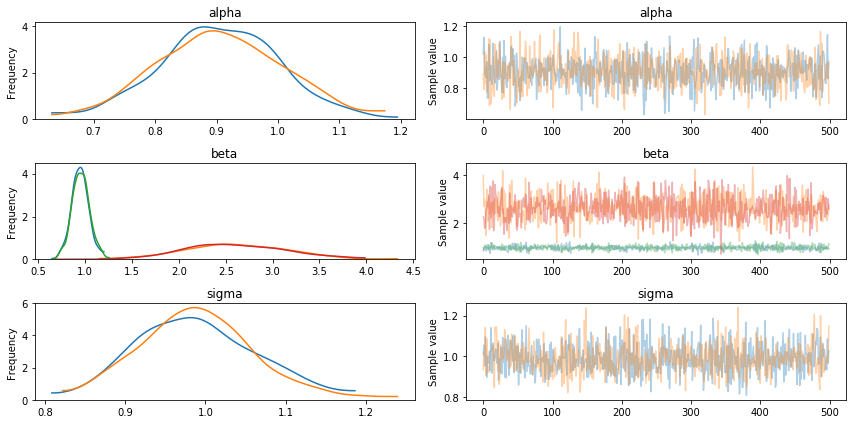

In [7]:
_ = pm.traceplot(trace)

In [8]:
pm.summary(trace)

mean 
 sd 
 mc_error 
 hpd_2.5 
 hpd_97.5 
 n_eff 
 Rhat 
 
 
 
 
 alpha 
 0.904619 
 0.097804 
 0.002686 
 0.720830 
 1.092549 
 1000.0 
 0.999163 
 
 
 beta__0 
 0.947115 
 0.092629 
 0.002394 
 0.744485 
 1.128060 
 1000.0 
 1.001146 
 
 
 beta__1 
 2.608587 
 0.538713 
 0.016015 
 1.602050 
 3.685764 
 1000.0 
 0.999511 
 
 
 sigma 
 0.989664 
 0.072976 
 0.001916 
 0.857547 
 1.140489 
 1000.0 
 0.999216